In [1]:
#!pip install networkx
#!pip install matplotlib
#!pip install apyori

In [1]:
import numpy as np
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import ast

import networkx as nx
import matplotlib.pyplot as plt

from apyori import apriori

In [23]:
df = pd.read_csv('Keword_cluster.csv', encoding = 'utf-8')
df

,_id,YNewsML.NewsContent.Title,YNewsML.NewsContent.Body,NamedEntity,Keyword,send_timestamp,Summarization,YNewsML.Metadata.Class.ClassCode,key+jaccard
0,AKR20221231041400061,신분당선 판교∼정자역 사이서 전동차 멈춰…1시간가량 불편,신분당선 판교∼정자역 사이서 전동차 멈춰1시간가량 불편 이영주 기자 = 31일 오후...,"[{'code': 'AF', 'word': '신분당선'}, {'code': 'LC'...","['정자역', '신분당선', '선로', '고장', '구원열차', '탑승', '꺼졌'...",2022-12-31T23:20:59,['31일 오후 9시 40분께 경기도 성남시 신분당선 판교역과 정자역 사이 선로에서...,"[{'code': '0410005', 'name': '철도운수'}, {'code':...",이태원압사참사
1,AKR20221231035000099,남아공 가스트럭 폭발사고 사망자 34명으로 늘어,남아공 가스트럭 폭발사고 사망자 34명으로 늘어 김성진 특파원 = 남아프리카공화국에...,"[{'code': 'LC', 'word': '남아공'}, {'code': 'AF',...","['남아공', '사망자', '폭발', '환자']",2022-12-31T18:08:13,"['남아프리카공화국에서 지난 크리스마스이브에 발생한 가스 트럭 폭발 사고와 관련, ...","[{'code': 1101001, 'name': '국제일반'}, {'code': '...",재난안전대응훈련
2,AKR20221231025151003,"선로에 떨어진 부직포 때문에…SRT, 운행 차질에 차량 고장까지(종합)",선로에 떨어진 부직포 때문에SRT 운행 차질에 차량 고장까지 전날 선로 전기공급 차...,"[{'code': 'AF', 'word': 'SRT'}, {'code': 'AF',...","['열차', '지연', 'GS건설', '고장', '전기공급', '차단', '통복터널']",2022-12-31T16:16:20,['선로 전기공급 차단 문제로 수서고속철도(SRT) 열차 운행이 이틀째 차질을 빚고...,"[{'code': '0201001', 'name': '경제일반'}, {'code':...",소방기술경연대회
3,AKR20221231025100003,선로 전기공급 끊기고 SRT 고장…이틀째 대거 운행지연·취소,선로 전기공급 끊기고 SRT 고장이틀째 대거 운행지연 취소 첫날 KTX SRT 최대...,"[{'code': 'AF', 'word': 'SRT'}, {'code': 'DT',...","['열차', '지연', 'SR', '전기공급', '끊기', '통복터널']",2022-12-31T12:57:34,['선로 전기공급 차단 문제로 수서고속철도(SRT) 열차 운행이 이틀째 차질을 빚고...,"[{'code': '0201001', 'name': '경제일반'}, {'code':...",태풍
4,AKR20221231022000076,캄보디아 카지노 호텔 화재 사망자 최소 27명으로…수색 종료,캄보디아 카지노 호텔 화재 사망자 최소 27명으로수색 종료 강종훈 특파원 = 지난 ...,"[{'code': 'LC', 'word': '캄보디아'}, {'code': 'QT'...","['화재', '27명', '태국인', '카지노', '뛰어내리', '훈센']",2022-12-31T11:51:25,['지난 28일 발생한 캄보디아 북서부 카지노 호텔 대형 화재로 인한 사망자가 최소...,"[{'code': 1101001, 'name': '국제일반'}, {'code': '...",힌남노태풍
...,...,...,...,...,...,...,...,...,...
1949,AKR20221016007052009,"이란 반정부 시위자 구금 교도소서 화재…""4명 사망·61명 부상""(종합2보)",이란 반정부 시위자 구금 교도소서 화재4명 사망 61명 부상 당국 범죄자들끼리 다투...,"[{'code': 'LC', 'word': '이란'}, {'code': 'QT', ...","['교도소', '정치범', '시위', '히잡']",2022-10-16T19:55:50,"[""이란 '히잡 의문사' 사건으로 촉발한 반정부 시위 참가자들이 대거 수용된 교도소...","[{'code': 1101001, 'name': '국제일반'}, {'code': '...",히잡 의문사' 사건
1950,AKR20221016006552017,'카톡' 없던 하루…초유 서비스장애에 '초연결사회' 흔들(종합2보),'카톡' 없던 하루초유 서비스장애에 '초연결사회' 흔들 어제 오후 데이터센터 화재 ...,"[{'code': 'TM', 'word': '카톡'}, {'code': 'DT', ...","['카카오', '서비스장애']",2022-10-16T18:17:28,['판교 SK C&amp;C 데이터센터 화재로 인해 카카오톡을 비롯한 카카오 계열 ...,"[{'code': '0901011', 'name': '인터넷'}, {'code': ...",정기국회
1951,AKR20221016007051009,"이란 '반정부 시위자 구금' 교도소서 화재…""수감자 신변 위험""(종합)",이란 '반정부 시위자 구금' 교도소서 화재수감자 신변 위험 당국 범죄자들끼리 다투는...,"[{'code': 'LC', 'word': '이란'}, {'code': 'EV', ...","['교도소', '시위', '정치범', '이란인권센터', '폭발음', '히잡']",2022-10-16T18:11:33,"[""이란 '히잡 의문사' 사건으로 촉발한 반정부 시위 참가자들이 대거 수용된 교도소...","[{'code': 1101001, 'name': '국제일반'}, {'code': '...",히잡 의문사' 사건
1952,AKR20221016038900017,"전문가들 ""통신시설 화재는 일상 마비…분산제어 투자 중요""",전문가들 통신시설 화재는 일상 마비분산제어 투자 중요 카카오가 보호조치 잘 못해국민...,"[{'code': 'OG', 'word': '카카오'}, {'code': 'OG',...","['통신구', '카카오']",2022-10-16T15:44:20,['SK 주식회사 C&amp;C 판교 데이터센터 화재는 통신 시설이 타격을 받으면 ...,"[{'code': '0410002', 'name': '육상운수'}, {'code':...",우크라이나전쟁


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   _id                               1954 non-null   object
 1   YNewsML.NewsContent.Title         1954 non-null   object
 2   YNewsML.NewsContent.Body          1954 non-null   object
 3   NamedEntity                       1954 non-null   object
 4   Keyword                           1954 non-null   object
 5   send_timestamp                    1954 non-null   object
 6   Summarization                     1954 non-null   object
 7   YNewsML.Metadata.Class.ClassCode  1954 non-null   object
 8   key+jaccard                       1954 non-null   object
dtypes: object(9)
memory usage: 137.5+ KB


In [5]:
df.isnull().sum()

_id                                 0
YNewsML.NewsContent.Title           0
YNewsML.NewsContent.Body            0
NamedEntity                         0
Keyword                             0
send_timestamp                      0
Summarization                       0
YNewsML.Metadata.Class.ClassCode    0
key+jaccard                         0
dtype: int64

In [6]:
df.columns.tolist()

['_id',
 'YNewsML.NewsContent.Title',
 'YNewsML.NewsContent.Body',
 'NamedEntity',
 'Keyword',
 'send_timestamp',
 'Summarization',
 'YNewsML.Metadata.Class.ClassCode',
 'key+jaccard']

In [24]:
list_y = []
for x in df['NamedEntity']:
    y = ast.literal_eval(x)
    list_y.append(y)
list_y

[[{'code': 'AF', 'word': '신분당선'},
  {'code': 'LC', 'word': '판교'},
  {'code': 'LC', 'word': '정자역'},
  {'code': 'AF', 'word': '전동차'},
  {'code': 'TI', 'word': '1시간가량'},
  {'code': 'DT', 'word': '31일'},
  {'code': 'TI', 'word': '오후 9시 40분께'},
  {'code': 'LC', 'word': '성남시'},
  {'code': 'LC', 'word': '판교역'},
  {'code': 'AF', 'word': '열차'},
  {'code': 'TI', 'word': '한 시간가량'},
  {'code': 'TI', 'word': '1시간 5분만'},
  {'code': 'DT', 'word': '이날'},
  {'code': 'TI', 'word': '오후 10시 45분께'},
  {'code': 'DT', 'word': '내일'}],
 [{'code': 'LC', 'word': '남아공'},
  {'code': 'AF', 'word': '가스트럭'},
  {'code': 'QT', 'word': '34명'},
  {'code': 'LC', 'word': '남아프리카공화국'},
  {'code': 'DT', 'word': '지난 크리스마스이브'},
  {'code': 'OG', 'word': 'AFP'},
  {'code': 'OG', 'word': '로이터통신'},
  {'code': 'DT', 'word': '30일'},
  {'code': 'OG', 'word': '보건부'},
  {'code': 'AF', 'word': '트럭'},
  {'code': 'QT', 'word': '27명'},
  {'code': 'OG', 'word': '탐보 메모리얼 병원'},
  {'code': 'QT', 'word': '11명'},
  {'code': 'QT', 'word': '23명'},


In [25]:
empty_list = []
for i in range(len(list_y)):
    empty_list2 = []
    for j in range(len(list_y[i])):
        empty_list2.append(list_y[i][j]['word'])
    empty_list.append(empty_list2)
empty_list

[['신분당선',
  '판교',
  '정자역',
  '전동차',
  '1시간가량',
  '31일',
  '오후 9시 40분께',
  '성남시',
  '판교역',
  '열차',
  '한 시간가량',
  '1시간 5분만',
  '이날',
  '오후 10시 45분께',
  '내일'],
 ['남아공',
  '가스트럭',
  '34명',
  '남아프리카공화국',
  '지난 크리스마스이브',
  'AFP',
  '로이터통신',
  '30일',
  '보건부',
  '트럭',
  '27명',
  '탐보 메모리얼 병원',
  '11명',
  '23명',
  '9세',
  '요하네스버그',
  '동쪽',
  '복스버그',
  '가스 트럭',
  '6만L',
  '액화석유가스',
  '100ｍ가량',
  '화상',
  '시릴 라마포사',
  '대통령'],
 ['SRT',
  '차량',
  '수서고속철도',
  '열차',
  '이틀째',
  '31일',
  'SR',
  '지난 30일',
  '오후 5시 3분께',
  '천안아산역',
  '지제역',
  '하나',
  '연말',
  '금요일',
  '저녁',
  '밤 11시 20분께',
  '7시간 동안',
  'KTX',
  '110대',
  '45대',
  '150여 대가',
  '2시간10분',
  '이날까지',
  '32대',
  '절반',
  '17대',
  '이날',
  '오후 2시',
  '하루',
  '120개',
  '18개',
  '1∼8호차',
  '11∼18호차',
  '18호차',
  '54분까지',
  '7개',
  '국토교통부',
  '국가철도공단',
  'GS건설',
  '한국철도공사',
  '코레일',
  '철도공단',
  '국토부',
  '철도안전법',
  '오봉역',
  '영등포역',
  '무궁화호'],
 ['SRT',
  '이틀째',
  '첫날',
  'KTX',
  '2시간여',
  '열차',
  '국토부',
  '수서고속철도',
  '31일',
  'SR',
  '지난 30일',
  '오후 5

In [15]:
import numpy as np

In [16]:
np.shape(empty_list)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1954,) + inhomogeneous part.

In [17]:
df_sample = pd.DataFrame(empty_list)

In [18]:
df_sample.columns.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147]

In [19]:
cols = [0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147]
df_sample['combined'] = df_sample[cols].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)

In [21]:
df_sample['combined']

0       신분당선, 판교, 정자역, 전동차, 1시간가량, 31일, 오후 9시 40분께, 성남...
1       남아공, 가스트럭, 34명, 남아프리카공화국, 지난 크리스마스이브, AFP, 로이터...
2       SRT, 차량, 수서고속철도, 열차, 이틀째, 31일, SR, 지난 30일, 오후 ...
3       SRT, 이틀째, 첫날, KTX, 2시간여, 열차, 국토부, 수서고속철도, 31일,...
4       캄보디아, 27명, 지난 28일, 북서부, 31일, 로이터 통신, 20여 명, 50...
                              ...                        
1949    이란, 4명, 61명, 히잡 의문사' 사건, 15일, 이날, 오후 9시 30분께, ...
1950    카톡, 하루, 대한민국, 판교, SK C&amp;C, 카카오톡, 카카오, 만 하루,...
1951    이란, 히잡 의문사' 사건, 15일, 이날, 오후 9시 30분께, 테헤란, 북부, ...
1952    카카오, SK 주식회사 C&amp;C, 판교, 16일, 전날, 카카오톡, 카카오페이...
1953    지난달, 제11호, 태풍 '힌남노', 의용소방대, 소방, 구한말로, 강화도 조약, ...
Name: combined, Length: 1954, dtype: object

In [22]:
df_sample.to_excel('df_sample.xlsx')

In [26]:
cond1 = (df['key+jaccard'] == '이태원압사참사')
df1 = df.loc[cond1]
df1

,_id,YNewsML.NewsContent.Title,YNewsML.NewsContent.Body,NamedEntity,Keyword,send_timestamp,Summarization,YNewsML.Metadata.Class.ClassCode,key+jaccard
0,AKR20221231041400061,신분당선 판교∼정자역 사이서 전동차 멈춰…1시간가량 불편,신분당선 판교∼정자역 사이서 전동차 멈춰1시간가량 불편 이영주 기자 = 31일 오후...,"[{'code': 'AF', 'word': '신분당선'}, {'code': 'LC'...","['정자역', '신분당선', '선로', '고장', '구원열차', '탑승', '꺼졌'...",2022-12-31T23:20:59,['31일 오후 9시 40분께 경기도 성남시 신분당선 판교역과 정자역 사이 선로에서...,"[{'code': '0410005', 'name': '철도운수'}, {'code':...",이태원압사참사
7,AKR20221230139200004,"[신년사] 오세훈 ""안전에 모든 노력…동행·매력도시 도약""",오세훈 안전에 모든 노력동행 매력도시 도약 윤보람 기자 = 오세훈 서울시장은 202...,"[{'code': 'PS', 'word': '오세훈'}, {'code': 'CV',...","['서울시민', '2023년', '狡兎三窟']",2022-12-31T10:00:04,"['오세훈 서울시장은 2023년 새해를 맞아 ""서울시민이 언제 어디를 가더라도 안전...","[{'code': '0501001', 'name': '사회일반'}, {'code':...",이태원압사참사
34,AKR20221230091800004,"이태원 참사 유족, '분향소 시위' 보수단체 접근금지 신청",이태원 참사 유족 '분향소 시위' 보수단체 접근금지 신청 이영섭 기자 = 이태원 참...,"[{'code': 'EV', 'word': '이태원 참사'}, {'code': 'L...","['유가족협의회', '보수단체', '서울서부지법', '시민분향소', '고소', '대...",2022-12-30T15:03:58,['이태원 참사 희생자 유족이 서울 녹사평역 시민분향소 인근에서 시위를 벌여온 보수...,"[{'code': '0501018', 'name': '재난일반'}, {'code':...",이태원압사참사
48,AKR20221230046200530,주최자 없는 행사도 지자체가 안전관리…인파관리시스템 구축,주최자 없는 행사도 지자체가 안전관리인파관리시스템 구축 주요 재난상황 경찰청이 행안...,"[{'code': 'OG', 'word': '경찰청'}, {'code': 'OG',...","['재난안전관리체계', '행안부', '인파관리시스템', '경찰', 'AI']",2022-12-30T10:20:10,['주요 재난상황에 대해 경찰청이 행정안전부와 시·도 등에 보고하도록 보고와 정보 ...,"[{'code': '0501018', 'name': '재난일반'}, {'code':...",이태원압사참사
55,AKR20221229150300004,주최 없는 행사 안전관리 등 서울시 조례 72건 공포,주최 없는 행사 안전관리 등 서울시 조례 72건 공포 고현실 기자 = 서울시는 30...,"[{'code': 'OG', 'word': '서울시'}, {'code': 'QT',...","['조례', '박원순', '마을관리소', '생활보조수당']",2022-12-30T06:00:02,['서울시는 30일 주최 없는 다중운집 행사의 안전관리 근거 등을 담은 조례 72건...,"[{'code': '0107002', 'name': '지방의회'}, {'code':...",이태원압사참사
...,...,...,...,...,...,...,...,...,...
1884,AKR20221030008500004,"[속보] ""이태원 압사 참사 사망자 149명…부상 150명""<소방당국>",이태원 압사 참사 사망자 149명부상 150명,"[{'code': 'EV', 'word': '이태원 압사 참사'}, {'code':...","['압사', '참사', '149명', '소방당국', '이태원', '150명', '부...",2022-10-30T06:01:38,"['""이태원 압사 참사 사망자 149명…부상 150명""<소방당국>']","[{'code': '0501001', 'name': '사회일반'}, {'code':...",이태원압사참사
1885,AKR20221030006700004,서울 한복판서 사상자 296명 참사…세월호 뒤 8년만에 최악,서울 한복판서 사상자 296명 참사세월호 뒤 8년만에 최악 이태원 압사참사 기록적인...,"[{'code': 'LC', 'word': '서울'}, {'code': 'QT', ...","['참사', '성수대교', '육박', '무너져', '292명']",2022-10-30T05:12:00,"[""29일 오후 10시 22분께 서울 용산구 이태원 일대에서 벌어진 압사 참사로 3...","[{'code': '0605001', 'name': '사건일반'}, {'code':...",이태원압사참사
1886,AKR20221030005651530,"복지부 ""이태원 참사에 서울-경기 15개 재난의료지원팀 출동""(종합)",복지부 이태원 참사에 서울 경기 15개 재난의료지원팀 출동 부상자 순천향서울병원 국...,"[{'code': 'OG', 'word': '복지부'}, {'code': 'EV',...","['현장응급의료소', '이대서울병원', '보건복지부', '압사', '중증', '인명...",2022-10-30T04:25:21,['보건복지부가 29일 밤 발생한 이태원 압사 참사와 관련해 15개 재난의료지원팀이...,"[{'code': '0507009', 'name': '응급의료'}, {'code':...",이태원압사참사
1887,AKR20221030005600530,"복지부 ""이태원 압사 참사에 9개 재난의료지원팀 출동""",복지부 이태원 압사 참사에 9개 재난의료지원팀 출동 김병규 기자 = 보건복지부가 2...,"[{'code': 'OG', 'word': '복지부'}, {'code': 'LC',...","['중앙응급의료상황실', '재난의료지원팀', '출동', '서울대학교병원팀', '보건...",2022-10-30T03:36:58,['보건복지부가 29일 발생한 이태원 압사 참사와 관련해 9개 재난의료지원팀이 현장...,"[{'code': '0507009', 'name': '응급의료'}, {'code':...",이태원압사참사


In [8]:
df1['NamedEntity'][0]

"[{'code': 'AF', 'word': '신분당선'}, {'code': 'LC', 'word': '판교'}, {'code': 'LC', 'word': '정자역'}, {'code': 'AF', 'word': '전동차'}, {'code': 'TI', 'word': '1시간가량'}, {'code': 'DT', 'word': '31일'}, {'code': 'TI', 'word': '오후 9시 40분께'}, {'code': 'LC', 'word': '성남시'}, {'code': 'LC', 'word': '판교역'}, {'code': 'AF', 'word': '열차'}, {'code': 'TI', 'word': '한 시간가량'}, {'code': 'TI', 'word': '1시간 5분만'}, {'code': 'DT', 'word': '이날'}, {'code': 'TI', 'word': '오후 10시 45분께'}, {'code': 'DT', 'word': '내일'}]"

In [27]:
list_y = []
for x in df1['NamedEntity']:
    y = ast.literal_eval(x)
    list_y.append(y)
list_y

[[{'code': 'AF', 'word': '신분당선'},
  {'code': 'LC', 'word': '판교'},
  {'code': 'LC', 'word': '정자역'},
  {'code': 'AF', 'word': '전동차'},
  {'code': 'TI', 'word': '1시간가량'},
  {'code': 'DT', 'word': '31일'},
  {'code': 'TI', 'word': '오후 9시 40분께'},
  {'code': 'LC', 'word': '성남시'},
  {'code': 'LC', 'word': '판교역'},
  {'code': 'AF', 'word': '열차'},
  {'code': 'TI', 'word': '한 시간가량'},
  {'code': 'TI', 'word': '1시간 5분만'},
  {'code': 'DT', 'word': '이날'},
  {'code': 'TI', 'word': '오후 10시 45분께'},
  {'code': 'DT', 'word': '내일'}],
 [{'code': 'PS', 'word': '오세훈'},
  {'code': 'CV', 'word': '서울시장'},
  {'code': 'DT', 'word': '새해'},
  {'code': 'LC', 'word': '서울시'},
  {'code': 'CV', 'word': '시장'},
  {'code': 'DT', 'word': '31일'},
  {'code': 'DT', 'word': '지난 여름'},
  {'code': 'QT', 'word': '158명'},
  {'code': 'EV', 'word': '이태원 참사'},
  {'code': 'DT', 'word': '2023년'},
  {'code': 'LC', 'word': '서울'},
  {'code': 'LC', 'word': '서울항'},
  {'code': 'AF', 'word': '대관람차'},
  {'code': 'LC', 'word': '한강'},
  {'code': 'QT'

In [10]:
list_y[0]

[{'code': 'AF', 'word': '신분당선'},
 {'code': 'LC', 'word': '판교'},
 {'code': 'LC', 'word': '정자역'},
 {'code': 'AF', 'word': '전동차'},
 {'code': 'TI', 'word': '1시간가량'},
 {'code': 'DT', 'word': '31일'},
 {'code': 'TI', 'word': '오후 9시 40분께'},
 {'code': 'LC', 'word': '성남시'},
 {'code': 'LC', 'word': '판교역'},
 {'code': 'AF', 'word': '열차'},
 {'code': 'TI', 'word': '한 시간가량'},
 {'code': 'TI', 'word': '1시간 5분만'},
 {'code': 'DT', 'word': '이날'},
 {'code': 'TI', 'word': '오후 10시 45분께'},
 {'code': 'DT', 'word': '내일'}]

In [11]:
list_y[0][0]['word']

'신분당선'

In [12]:
len(list_y)

1255

In [28]:
empty_list = []
for i in range(len(list_y)):
    empty_list2 = []
    for j in range(len(list_y[i])):
        empty_list2.append(list_y[i][j]['word'])
    empty_list.append(empty_list2)
empty_list

[['신분당선',
  '판교',
  '정자역',
  '전동차',
  '1시간가량',
  '31일',
  '오후 9시 40분께',
  '성남시',
  '판교역',
  '열차',
  '한 시간가량',
  '1시간 5분만',
  '이날',
  '오후 10시 45분께',
  '내일'],
 ['오세훈',
  '서울시장',
  '새해',
  '서울시',
  '시장',
  '31일',
  '지난 여름',
  '158명',
  '이태원 참사',
  '2023년',
  '서울',
  '서울항',
  '대관람차',
  '한강',
  '3천만명',
  '서울창업허브',
  '강남',
  '제2',
  '마포',
  '인공지능',
  'AI',
  '양재',
  '아시아',
  '3배',
  '버스',
  '토끼',
  '세 개의'],
 ['이태원 참사',
  '녹사평역',
  '법원',
  '30일',
  '10·29 이태원 참사',
  '전날',
  '신자유연대',
  '김상진',
  '대표',
  '서울서부지법',
  '대한변호사협회',
  '대한변협',
  '이달 14일',
  '녹사평역 광장',
  '이태원 참사 추모제',
  '21일',
  '이종철',
  '협의회장',
  '경찰',
  '협회장이'],
 ['경찰청',
  '행안부',
  'CCTV',
  '다음달',
  '이태원 참사',
  '경찰',
  '소방',
  '행정안전부',
  '시·도',
  '이상민',
  '행안부 장관',
  '30일',
  '6차',
  '장관',
  '자치경찰제',
  '인공지능',
  'AI',
  '사물인터넷',
  'IoT',
  '디지털트윈',
  '정부',
  '지난 11월 18일',
  '이달 말',
  '다음 달'],
 ['서울시',
  '72건',
  '30일',
  '서울시',
  '이태원 참사',
  '시장',
  '경찰',
  '생활보조수당',
  '10만',
  '20만원',
  '이날',
  '박원순',
  '11∼12월',
  '315회',
  '시의회',


In [29]:
result = list(apriori(empty_list, min_support = 0.03))
df2 = pd.DataFrame(result)
df2

,items,support,ordered_statistics
0,(112),0.038247,"[((), (112), 0.03824701195219123, 1.0)]"
1,(11일),0.047809,"[((), (11일), 0.04780876494023904, 1.0)]"
2,(16일),0.041434,"[((), (16일), 0.04143426294820717, 1.0)]"
3,(1명),0.054980,"[((), (1명), 0.0549800796812749, 1.0)]"
4,(1일),0.113147,"[((), (1일), 0.11314741035856574, 1.0)]"
...,...,...,...
314,"(핼러윈, 이태원, 이태원 참사)",0.047809,"[((), (핼러윈, 이태원, 이태원 참사), 0.04780876494023904,..."
315,"(중대본, 중앙재난안전대책본부, 이태원 참사)",0.036653,"[((), (중대본, 중앙재난안전대책본부, 이태원 참사), 0.03665338645..."
316,"(중대본, 정부, 중앙재난안전대책본부)",0.031076,"[((), (정부, 중대본, 중앙재난안전대책본부), 0.031075697211155..."
317,"(이날, 이태원, 경찰, 이태원 참사)",0.034263,"[((), (이날, 이태원, 경찰, 이태원 참사), 0.034262948207171..."


In [30]:
df2['length'] = df2['items'].apply(lambda x : len(x))
df2

,items,support,ordered_statistics,length
0,(112),0.038247,"[((), (112), 0.03824701195219123, 1.0)]",1
1,(11일),0.047809,"[((), (11일), 0.04780876494023904, 1.0)]",1
2,(16일),0.041434,"[((), (16일), 0.04143426294820717, 1.0)]",1
3,(1명),0.054980,"[((), (1명), 0.0549800796812749, 1.0)]",1
4,(1일),0.113147,"[((), (1일), 0.11314741035856574, 1.0)]",1
...,...,...,...,...
314,"(핼러윈, 이태원, 이태원 참사)",0.047809,"[((), (핼러윈, 이태원, 이태원 참사), 0.04780876494023904,...",3
315,"(중대본, 중앙재난안전대책본부, 이태원 참사)",0.036653,"[((), (중대본, 중앙재난안전대책본부, 이태원 참사), 0.03665338645...",3
316,"(중대본, 정부, 중앙재난안전대책본부)",0.031076,"[((), (정부, 중대본, 중앙재난안전대책본부), 0.031075697211155...",3
317,"(이날, 이태원, 경찰, 이태원 참사)",0.034263,"[((), (이날, 이태원, 경찰, 이태원 참사), 0.034262948207171...",4


In [31]:
df2 = df2[(df2['length'] == 2) & (df2['support'] >= 0.01)].sort_values(by = 'support', ascending = False) 
df2

,items,support,ordered_statistics,length
231,"(이태원, 이태원 참사)",0.210359,"[((), (이태원, 이태원 참사), 0.2103585657370518, 1.0),...",2
214,"(이날, 이태원 참사)",0.176096,"[((), (이날, 이태원 참사), 0.17609561752988048, 1.0),...",2
133,"(경찰, 이태원 참사)",0.159363,"[((), (경찰, 이태원 참사), 0.1593625498007968, 1.0), ...",2
197,"(오후, 이태원 참사)",0.142629,"[((), (오후, 이태원 참사), 0.14262948207171314, 1.0),...",2
193,"(오전, 이태원 참사)",0.123506,"[((), (오전, 이태원 참사), 0.12350597609561753, 1.0),...",2
...,...,...,...,...
151,"(국회, 이상민)",0.030279,"[((), (국회, 이상민), 0.030278884462151396, 1.0), (...",2
200,"(용산경찰서, 이태원 참사)",0.030279,"[((), (용산경찰서, 이태원 참사), 0.030278884462151396, 1...",2
144,"(공무원, 이태원 참사)",0.030279,"[((), (공무원, 이태원 참사), 0.030278884462151396, 1.0...",2
201,"(이날, 용산구)",0.030279,"[((), (이날, 용산구), 0.030278884462151396, 1.0), (...",2


In [32]:
G = nx.Graph()
ar = (df2['items'])
G.add_edges_from(ar)

df_network = pd.DataFrame(pos)
df_ner = df_network.T.reset_index()
df_ner

In [35]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [36]:
#pos = nx.planar_layout(G)
#pos = nx.rescale_layout(G)
#pos = nx.fruchterman_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.random_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.bipartite_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)

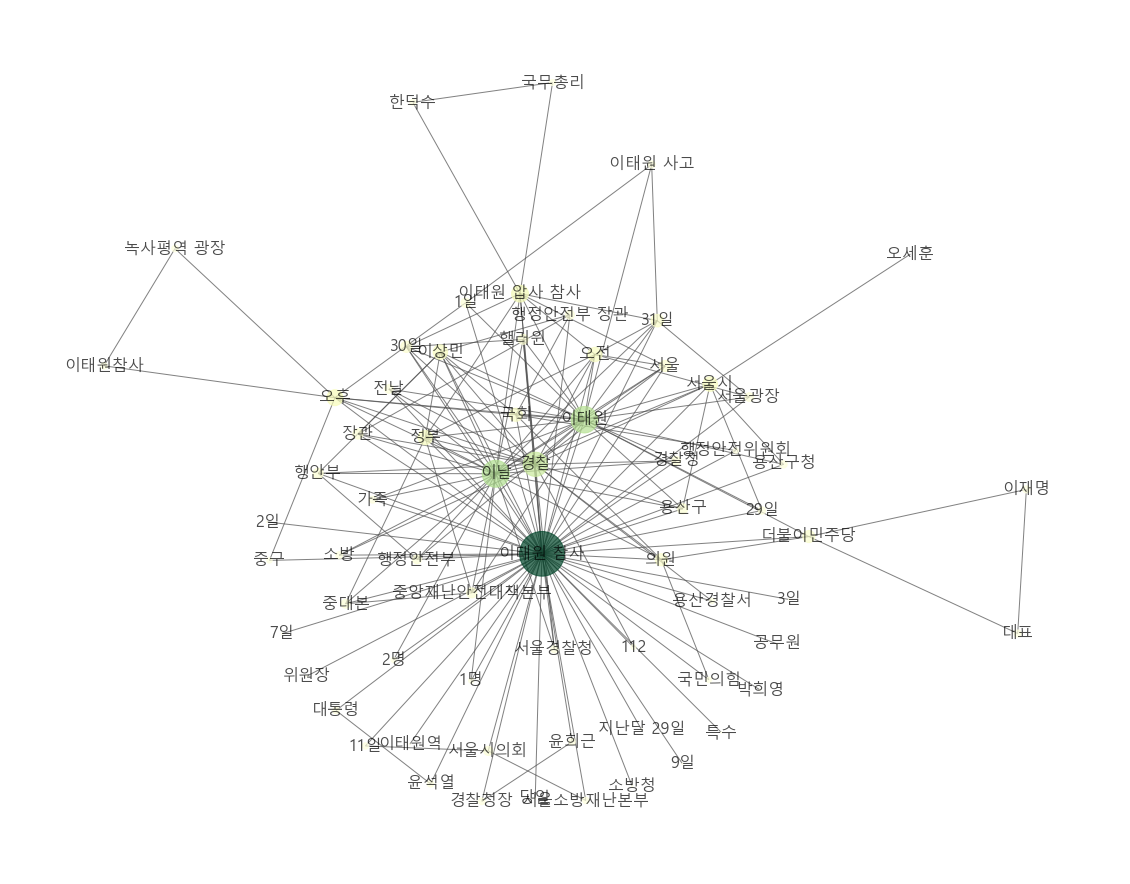

In [37]:
plt.figure(figsize = (20, 16))
plt.axis('off')
nx.draw_networkx(G, font_family = "Malgun Gothic", font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                                            alpha = 0.7, edge_color = '.3', cmap = plt.cm.YlGn)

In [43]:
test = pd.DataFrame(pos).T.reset_index()

In [52]:
test

,index,0,1
0,이태원,0.081759,0.223264
1,이태원 참사,-0.006325,-0.068126
2,이날,-0.102282,0.105868
3,경찰,-0.020044,0.126361
4,오후,-0.436423,0.271097
...,...,...,...
62,지난달 29일,0.200267,-0.449713
63,9일,0.285385,-0.524245
64,박희영,0.446260,-0.363508
65,오세훈,0.759102,0.583100


In [55]:
test.to_dict('list')

{'index': ['이태원',
  '이태원 참사',
  '이날',
  '경찰',
  '오후',
  '오전',
  '정부',
  '31일',
  '서울',
  '서울광장',
  '핼러윈',
  '이상민',
  '행정안전부 장관',
  '용산구',
  '3일',
  '경찰청',
  '이태원 압사 참사',
  '의원',
  '서울시',
  '국회',
  '1일',
  '전날',
  '2일',
  '소방',
  '30일',
  '이태원 사고',
  '중구',
  '녹사평역 광장',
  '국무총리',
  '한덕수',
  '7일',
  '행안부',
  '장관',
  '29일',
  '더불어민주당',
  '행정안전부',
  '이태원참사',
  '중대본',
  '중앙재난안전대책본부',
  '가족',
  '11일',
  '위원장',
  '2명',
  '대통령',
  '서울경찰청',
  '윤석열',
  '1명',
  '국민의힘',
  '이태원역',
  '경찰청장',
  '윤희근',
  '서울시의회',
  '용산구청',
  '당일',
  '서울소방재난본부',
  '소방청',
  '행정안전위원회',
  '112',
  '용산경찰서',
  '대표',
  '이재명',
  '특수',
  '지난달 29일',
  '9일',
  '박희영',
  '오세훈',
  '공무원'],
 0: [0.08175866893950587,
  -0.006325407152240118,
  -0.10228202461215634,
  -0.02004402620806046,
  -0.4364228839429093,
  0.10370092167356254,
  -0.2487484219760199,
  0.23328131538882618,
  0.24959991398774808,
  0.42436018656018243,
  -0.04535979012122662,
  -0.2174092018331618,
  0.05166886711202899,
  0.2857872372450357,
  0.5069552657979512,

In [64]:
pr

{'이태원': 0.06174257773548001,
 '이태원 참사': 0.16750291868751999,
 '이날': 0.06405303927500705,
 '경찰': 0.05253650413716371,
 '오후': 0.025401854447540163,
 '오전': 0.02152151146634174,
 '정부': 0.02156726854803093,
 '31일': 0.01773497053441367,
 '서울': 0.014932549439059827,
 '서울광장': 0.010898348174832422,
 '핼러윈': 0.012896832247732188,
 '이상민': 0.02198535891057501,
 '행정안전부 장관': 0.011319576387875143,
 '용산구': 0.013096674077012727,
 '3일': 0.004693753599935655,
 '경찰청': 0.010758833824945654,
 '이태원 압사 참사': 0.027709718750280363,
 '의원': 0.01687108332502377,
 '서울시': 0.02200355456578274,
 '국회': 0.01895611264723615,
 '1일': 0.011627838848792373,
 '전날': 0.010758833824945654,
 '2일': 0.004693753599935655,
 '소방': 0.008740255969869437,
 '30일': 0.01509234943376787,
 '이태원 사고': 0.00888169122264641,
 '중구': 0.007092761098747926,
 '녹사평역 광장': 0.008065815248225274,
 '국무총리': 0.0076173059096993415,
 '한덕수': 0.0076173059096993415,
 '7일': 0.004693753599935655,
 '행안부': 0.01314629058849825,
 '장관': 0.013221998553402047,
 '29일': 0.00905

In [63]:
type(pr)

dict

In [66]:
d = pd.DataFrame(list(pr.items()),
                   columns=['Quantity', 'FruitName'])

In [70]:
a = pd.merge(test, d, left_on = 'index', right_on = 'Quantity', how = 'outer')

In [71]:
b = a.drop(['Quantity'], axis = 1)
b

,index,0,1,FruitName
0,이태원,0.081759,0.223264,0.061743
1,이태원 참사,-0.006325,-0.068126,0.167503
2,이날,-0.102282,0.105868,0.064053
3,경찰,-0.020044,0.126361,0.052537
4,오후,-0.436423,0.271097,0.025402
...,...,...,...,...
62,지난달 29일,0.200267,-0.449713,0.004694
63,9일,0.285385,-0.524245,0.004694
64,박희영,0.446260,-0.363508,0.004694
65,오세훈,0.759102,0.583100,0.004577


In [72]:
b.to_excel('b.xlsx')

In [58]:
test[['index']].to_dict(orient='list')

{'index': ['이태원',
  '이태원 참사',
  '이날',
  '경찰',
  '오후',
  '오전',
  '정부',
  '31일',
  '서울',
  '서울광장',
  '핼러윈',
  '이상민',
  '행정안전부 장관',
  '용산구',
  '3일',
  '경찰청',
  '이태원 압사 참사',
  '의원',
  '서울시',
  '국회',
  '1일',
  '전날',
  '2일',
  '소방',
  '30일',
  '이태원 사고',
  '중구',
  '녹사평역 광장',
  '국무총리',
  '한덕수',
  '7일',
  '행안부',
  '장관',
  '29일',
  '더불어민주당',
  '행정안전부',
  '이태원참사',
  '중대본',
  '중앙재난안전대책본부',
  '가족',
  '11일',
  '위원장',
  '2명',
  '대통령',
  '서울경찰청',
  '윤석열',
  '1명',
  '국민의힘',
  '이태원역',
  '경찰청장',
  '윤희근',
  '서울시의회',
  '용산구청',
  '당일',
  '서울소방재난본부',
  '소방청',
  '행정안전위원회',
  '112',
  '용산경찰서',
  '대표',
  '이재명',
  '특수',
  '지난달 29일',
  '9일',
  '박희영',
  '오세훈',
  '공무원']}

In [ ]:
df.to_dict('list')
# {'Age': [16, 20, 18],
# 'City': ['Seoul', 'Busan', 'Seoul'],
# 'Name': ['철수', '영희', '희철']}

In [ ]:
print(df.to_dict(orient='list'))
>>
{'col1': [1, 3], 'col2': [2, 4]}

In [49]:
a = pd.DataFrame([[1,2],[3,4]], columns=['col1','col2'],index=['row1','row2'])

In [51]:
a

,col1,col2
row1,1,2
row2,3,4


In [50]:
print(a.to_dict(orient='list'))

{'col1': [1, 3], 'col2': [2, 4]}


In [21]:
df1['Keyword']

0       ['정자역', '신분당선', '선로', '고장', '구원열차', '탑승', '꺼졌'...
7                               ['서울시민', '2023년', '狡兎三窟']
34      ['유가족협의회', '보수단체', '서울서부지법', '시민분향소', '고소', '대...
48             ['재난안전관리체계', '행안부', '인파관리시스템', '경찰', 'AI']
55                       ['조례', '박원순', '마을관리소', '생활보조수당']
                              ...                        
1884    ['압사', '참사', '149명', '소방당국', '이태원', '150명', '부...
1885                  ['참사', '성수대교', '육박', '무너져', '292명']
1886    ['현장응급의료소', '이대서울병원', '보건복지부', '압사', '중증', '인명...
1887    ['중앙응급의료상황실', '재난의료지원팀', '출동', '서울대학교병원팀', '보건...
1888    ['중앙재난안전대책본부', '尹대통령', '압사', '정부청사', '이태원동', '...
Name: Keyword, Length: 1255, dtype: object

In [22]:
df1['Keyword'][0]

"['정자역', '신분당선', '선로', '고장', '구원열차', '탑승', '꺼졌', '1시간']"

In [23]:
list_y1 = []
for x1 in df1['Keyword']:
    y1 = ast.literal_eval(x1)
    list_y1.append(y1)
list_y1

[['정자역', '신분당선', '선로', '고장', '구원열차', '탑승', '꺼졌', '1시간'],
 ['서울시민', '2023년', '狡兎三窟'],
 ['유가족협의회', '보수단체', '서울서부지법', '시민분향소', '고소', '대한변호사협회', '시위', '접근금지'],
 ['재난안전관리체계', '행안부', '인파관리시스템', '경찰', 'AI'],
 ['조례', '박원순', '마을관리소', '생활보조수당'],
 ['전북시민대책위원회', '추모', '시민분향소'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회', '용산구청', '29일', '오세훈', '기관보고', '국회', '의원질의'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '29일',
  '서울시장',
  '기관보고',
  '국회',
  '의원질의',
  '답변',
  '2022.12.29'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '오세훈',
  '29일',
  '서울시장',
  '국조특위',
  '기관보고',
  '의원질의',
  '답변'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '오세훈',
  '29일',
  '서울시장',
  '기관보고',
  '국회',
  '의원질의',
  '답변'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '오세훈',
  '29일',
  '서울시장',
  '기관보고',
  '국회',
  '의원질의'],
 ['이태원참사진상규명과재발방지',
  '용산구청',
  '29일',
  '위한국정조사특별위원회',
  '기관보고',
  '권윤구',
  '의원질의',
  '답변',
  '행정지원국장'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회', '용산구청', '오세훈', '29일', '기관보고', '국회', '마스크'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '참사진상규명과재발방

In [24]:
list_y1[0]

['정자역', '신분당선', '선로', '고장', '구원열차', '탑승', '꺼졌', '1시간']

In [25]:
list_y1[0][0]

'정자역'

In [26]:
dataset = []
for i in range(len(list_y1)):
    dataset.append(list_y1[i])
    
dataset

[['정자역', '신분당선', '선로', '고장', '구원열차', '탑승', '꺼졌', '1시간'],
 ['서울시민', '2023년', '狡兎三窟'],
 ['유가족협의회', '보수단체', '서울서부지법', '시민분향소', '고소', '대한변호사협회', '시위', '접근금지'],
 ['재난안전관리체계', '행안부', '인파관리시스템', '경찰', 'AI'],
 ['조례', '박원순', '마을관리소', '생활보조수당'],
 ['전북시민대책위원회', '추모', '시민분향소'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회', '용산구청', '29일', '오세훈', '기관보고', '국회', '의원질의'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '29일',
  '서울시장',
  '기관보고',
  '국회',
  '의원질의',
  '답변',
  '2022.12.29'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '오세훈',
  '29일',
  '서울시장',
  '국조특위',
  '기관보고',
  '의원질의',
  '답변'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '오세훈',
  '29일',
  '서울시장',
  '기관보고',
  '국회',
  '의원질의',
  '답변'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '용산구청',
  '오세훈',
  '29일',
  '서울시장',
  '기관보고',
  '국회',
  '의원질의'],
 ['이태원참사진상규명과재발방지',
  '용산구청',
  '29일',
  '위한국정조사특별위원회',
  '기관보고',
  '권윤구',
  '의원질의',
  '답변',
  '행정지원국장'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회', '용산구청', '오세훈', '29일', '기관보고', '국회', '마스크'],
 ['이태원참사진상규명과재발방지를위한국정조사특별위원회',
  '참사진상규명과재발방

In [27]:
# 원하는 변수들을 인덱스/컬럼 으로 재정렬
# 각 단어의 포함 여부를 one-hot encoding하여 array 로 변환 
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [28]:
# 변환된 array를 dataframe으로 변환 후 확인
df3 = pd.DataFrame(te_ary, columns = te.columns_)
df3
# 혹시 1 또는 0으로 변경하고 싶다면
# print(pd.DataFrame(te_ary.astype('int'), columns=te.columns_))

,0221998660,0312306653,10,10.29,104건,10대,10명,10시51분,10시53분,10일,...,회의,회의실,회장,회피,효과,후속대책,훈련,흥겹,희생자,희생자분
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1252,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1253,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# 지지도 도출 -> 수가 많을 수 있으므로 min_support 로 일정 이상의 지지도만 도출 (default=0.5)
frequent_itemsets = apriori(df3, min_support = 0, use_colnames = True)
frequent_itemsets

<generator object apriori at 0x7f1a2f759a50>

In [30]:
df4 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
df4

AttributeError: 'generator' object has no attribute 'shape'

In [ ]:
df4.sort_values('lift', ascending = False)

In [ ]:
df4['antecedents_length'] = df4['antecedents'].apply(lambda x : len(x))
df4['consequents_length'] = df4['consequents'].apply(lambda x : len(x))
df4

In [ ]:
cond1 = df4['antecedents_length'] == 1
cond2 = df4['consequents_length'] == 1
cond3 = df4['conviction'] >= 1

df5 = df4.loc[cond1 & cond2 & cond3]
df5

In [ ]:
df5.sort_values(by = [],ascending = [False])

In [ ]:
SCRIPT_STR("
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import ast
import networkx as nx
import matplotlib.pyplot as plt
from apyori import apriori

#data = list(_arg1)
df = pd.DataFrame(
    {'_id' : _arg1,
    'YNewsML.NewsContent.Title' : _arg2,
    'YNewsML.NewsContent.Body' : _arg3,
    'NamedEntity' : _arg4,
    'Keyword' : _arg5,
    'send_timestamp' : _arg6,
    'Summarization' : _arg7,
    'YNewsML.Metadata.Class.ClassCode' : _arg8,
    'key+jaccard' : _arg9,
})


cond1 = (df['key+jaccard'] == '이태원압사참사')
df1 = df.loc[cond1]

list_y = []
for x in df1['NamedEntity']:
    y = ast.literal_eval(x)
    list_y.append(y)

empty_list = []
for i in range(len(list_y)):
    empty_list2 = []
    for j in range(len(list_y[i])):
        empty_list2.append(list_y[i][j]['word'])
    empty_list.append(empty_list2)

result = list(apriori(empty_list, min_support = 0.03))
df2 = pd.DataFrame(result)

df2['length'] = df2['items'].apply(lambda x : len(x))
df2 = df2[(df2['length'] == 2) & (df2['support'] >= 0.01)].sort_values(by = 'support', ascending = False) 

G = nx.Graph()
ar = (df2['items'])
G.add_edges_from(ar)

pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

pos = nx.kamada_kawai_layout(G)

df_network = pd.DataFrame(pos)
df_network = df_network.T.reset_index()
return df_network[['index']].to_dict(orient='list')
", ATTR([_Id]), ATTR([YNewsML.NewsContent.Title]), ATTR([YNewsML.NewsContent.Body]), ATTR([Named Entity]), ATTR([Keyword]), ATTR([Send Timestamp]), ATTR([Summarization]), ATTR([YNewsML.Metadata.Class.ClassCode]), ATTR([Key+Jaccard]))